## Goal:

Search for anomalies in the time series of hotel room prices with unsupervised learning (no labeled data).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
%matplotlib inline

Using TensorFlow backend.


In [2]:
#df = pd.read_csv("temperature2.csv", sep=";") 
               # dtype={'Global_active_power ': float,'Global_reactive_power':float}).head(100)
#df['Date'] = pd.to_datetime(df['Date'])
#df['Time'] = pd.to_datetime(df['Time'])
#df['Date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
#df['Time_delta'] = (df['Time'] - df['Time'].min())  / np.timedelta64(1,'D')
our1 = pd.read_excel("dataset.xlsx")
our2 = pd.read_excel("meteo.xlsx")
df = pd.merge(our1, our2, on='Temps')
#df.dtypes
#df.describe
df

,Temps,T1_1,T1_2,T2_1,T2_2,T3_1,T3_2,T4_1,T4_2,T5_1,...,T8_1,T8_2,T9_1,T9_2,Temperature exterieure,Pression,Radiance,Humidite,Direction vent,Vitesse vent
0,0,27.88,28.34,25.12,27.30,20.32,23.66,26.28,25.09,27.76,...,26.61,25.82,28.37,25.79,25.200001,986.500000,0.0,47.500000,288.100006,2.4
1,120,27.88,28.34,25.25,27.44,37.26,23.73,26.28,25.09,27.50,...,26.61,25.82,28.31,25.59,25.299999,986.599976,0.0,47.500000,284.000000,2.8
2,240,27.74,28.34,25.12,27.50,39.64,23.93,26.28,25.09,27.50,...,26.68,25.82,28.37,25.79,25.299999,986.700012,0.0,47.500000,285.100006,2.2
3,360,27.94,28.34,25.25,27.24,17.83,23.73,26.28,25.09,27.50,...,26.61,25.88,28.17,25.59,25.200001,986.599976,0.0,47.900002,286.500000,2.6
4,480,27.94,28.34,25.05,27.44,44.58,23.86,26.28,25.09,27.50,...,26.41,25.82,28.17,25.59,25.200001,986.700012,0.0,47.799999,267.600006,3.3
5,600,27.88,28.47,25.12,27.50,38.23,23.86,26.22,25.09,27.56,...,26.68,25.88,28.17,25.59,25.200001,986.799988,0.0,47.900002,282.500000,3.4
6,720,27.88,28.27,25.12,27.30,30.01,23.86,26.22,25.02,27.56,...,26.61,25.62,28.37,25.59,25.200001,986.900024,0.0,48.099998,282.899994,3.1
7,840,27.74,28.34,25.12,27.50,46.68,23.93,26.28,25.09,27.50,...,26.81,25.82,28.31,25.73,25.200001,987.000000,0.0,48.099998,269.500000,2.9
8,960,27.88,28.34,25.12,27.50,42.09,23.93,26.28,25.09,27.50,...,26.61,25.88,28.17,25.59,25.200001,987.099976,0.0,48.299999,284.100006,3.2
9,1080,27.88,28.27,25.12,27.50,16.61,24.06,26.28,25.02,27.56,...,26.41,25.62,28.11,25.73,25.200001,987.200012,0.0,48.299999,282.000000,3.8


In [3]:
#df['ExternalTemp'].value_counts()

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#df['T6_2'].describe()
#df['T3_2'].describe()
#df['T5_2'].describe()
#df['T7_2'].describe()
#df['T9_2'].describe()

df['T6_2'].describe()

count   2880.000
mean      29.477
std       12.074
min       17.490
25%       21.180
50%       23.970
75%       35.178
max       68.550
Name: T6_2, dtype: float64

In [5]:
#df['FloorArea'].describe()

In [6]:
#df['Internaltemp'].describe()



In [7]:
#df['NumberofPeople'].min(), df['NumberofPeople'].max()


In [8]:
#df.info()

In [9]:
#df = df.sort_values('ExternalTemp')
#df['Internaltemp'].describe()

At this point, we have detected one extreme anomaly which was the Max price_usd at 5584. If an individual data instance can be considered as anomalous with respect to the rest of the data, we call it Point Anomalies (e.g. purchase with large transaction value). We could go back to check the log to see what was it about. After a little bit investigation, I guess it was either a mistake or user seached a presidential suite by accident and had no intention to book or view. In order to find more anomalies that are not extreme, I decided to remove this one.
Переписать на свои данные

In [10]:
#df.loc[(df['Internaltemp'] > 390.370)]

In [11]:
#df = df.loc[df['Internaltemp'] < 50]

In [12]:
#df.to_csv('TimeSeriesExpedia.csv', index=False)

In [13]:
#df['Internaltemp'].describe()

After removing that Point Anomaly, we can at least visualize the rest of the data, and perhaps find out more anomalies in several ways.

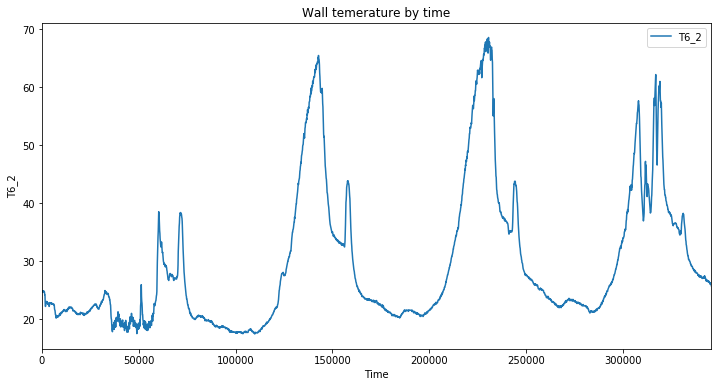

In [14]:
# plot the data
df.plot(x='Temps', y='T6_2', figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('T6_2')
plt.title('Wall temerature by time');



In [15]:
#df.head()

In [16]:
# a = df.loc[df['IsHeatingOn'] == 0, 'Internaltemp']
# b = df.loc[df['IsHeatingOn'] == 1, 'Internaltemp']
# plt.figure(figsize=(10, 6))
# plt.hist(a, bins = 30, alpha=0.5, label='Search heating off')
# plt.hist(b, bins = 30, alpha=0.5, label='Search heating on')
# plt.legend(loc='upper right')
# plt.xlabel('temperature')
# plt.ylabel('count on/off heating for different temperature')
# plt.show();

In general, the price is more stable and lower when searching Non-Saturday night. And the price goes up when searching Saturday night. 

In [17]:
#df['IsHeatingOn'].value_counts()

In [18]:
#df.head()

The useful features for our further analysis are "price_usd", "srch_booking_window" and "srch_saturday_night_bool".

## Clustering-Based Anomaly Detection

### k-means algorithm

k-means is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies.

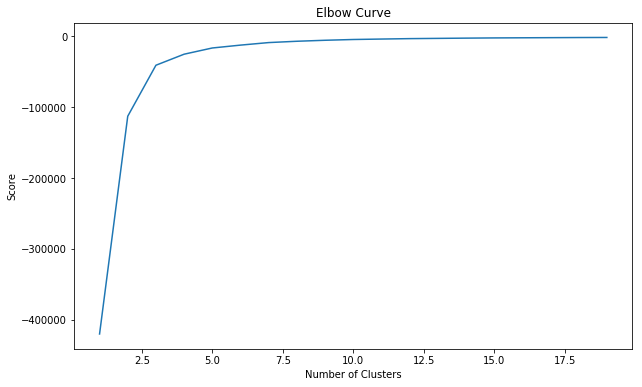

In [19]:
#data = df[['ExternalTemp', 'Internaltemp','IsHeatingOn','NumberofPeople']]
data = df[['T6_1','T6_2']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]#оценка погр, сренее расст(все расстрояния поделеные на кол-во эл-тов в класере) от центра кластера к его эл-там

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

From the above elbow curve, we see that the graph levels off after 10 clusters, implying that addition of more clusters do not explain much more of the variance in our relevant variable; in this case price_usd.

we set n_clusters=10, and upon generating the k-means output use the data to plot the 3D clusters:

In [20]:
#X = df[['Internaltemp', 'ExternalTemp', 'IsHeatingOn','NumberofPeople']]
X = df[['T6_1','T6_2']]
X = X.reset_index(drop=True) #Reset the index of the DataFrame, and use the default one instead.
km = KMeans(n_clusters=10)
km.fit(X) #Compute k-means clustering.
km.predict(X) #Predict the closest cluster each sample in X belongs to.
labels = km.labels_
#Plotting
#fig = plt.figure(1, figsize=(7,7))
#ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
#ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,3],
 #         c=labels.astype(np.float), edgecolor="k")
#ax.set_xlabel("Internaltemp")
#ax.set_ylabel("ExternalTemp")
#ax.set_zlabel("NumberofPeople")

#plt.title("K Means", fontsize=14);

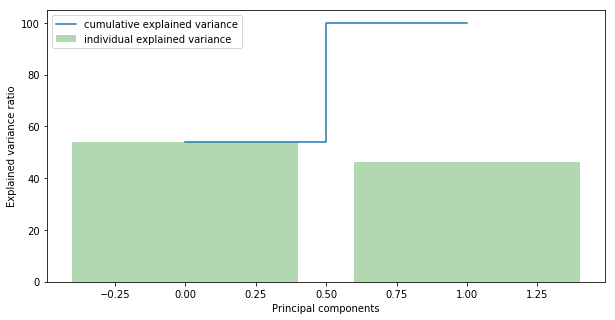

In [21]:
#data = df[['Internaltemp', 'ExternalTemp', 'IsHeatingOn','NumberofPeople']]
data = df[['T6_1','T6_2']]
X = data.values
X_std = StandardScaler().fit_transform(X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix, показывают какая корреляция между данными уч выборки
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)#сортируем по величине собственного зн-ния

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

We see that the first component explains almost 50% of the variance. The second component explains over 30%. However, we've got to notice that almost none of the components are really negligible. The first 2 components contain over  80%  of the information. So, we will set n_components=2.

In [22]:
# Take useful feature and standardize them
#data = df[['Internaltemp', 'ExternalTemp', 'IsHeatingOn','NumberofPeople']]
data = df[['T6_1','T6_2']]
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [23]:
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
df['cluster'] = kmeans[9].predict(data)
df.index = data.index
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

5    654
0    521
7    353
4    267
9    245
2    230
3    222
1    158
6    126
8    104
Name: cluster, dtype: int64

In [24]:
#df.head()

### Clustering Approach

The underline assumption in the clustering approach is that if we cluster the data, normal data will belong to clusters while anomalies will not belong to any clusters or belong to small clusters.

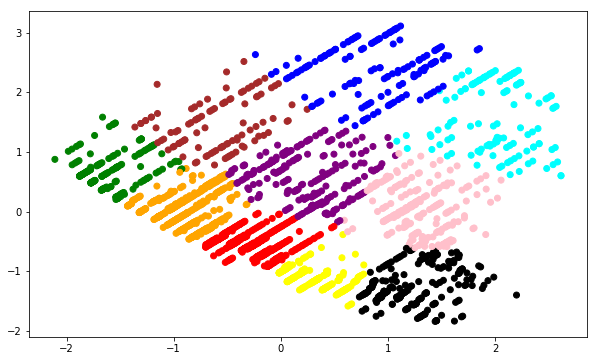

In [25]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show();

In [26]:
# return Series of distance between each point and its distance with the closest centroid
#чтоб выбрать к какому центроиду принадлежит объект 
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.03
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min() #threshold is the minimum distance of these outliers.
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = (distance >= threshold).astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


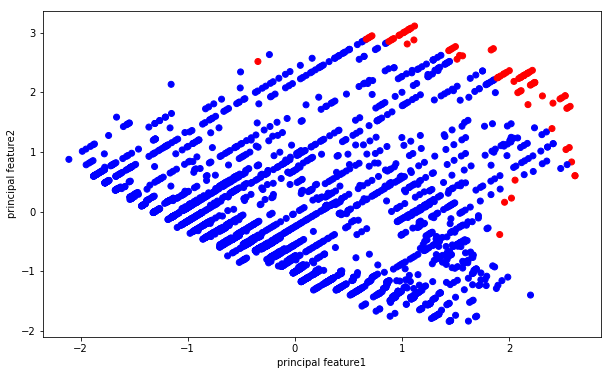

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

In [28]:
df.anomaly1.value_counts()

0    2794
1      86
Name: anomaly1, dtype: int64

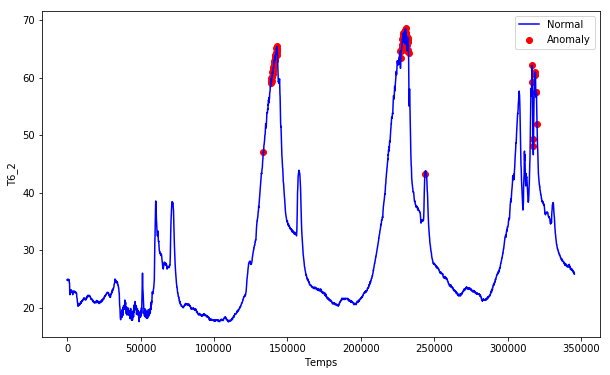

In [29]:
#df = df.sort_values('ExternalTemp') #'Internaltemp', 'ExternalTemp', 'IsHeatingOn','NumberofPeople'
df = df.sort_values('Temps')
fig, ax = plt.subplots(figsize=(10,6))
#data = df[['T1_1','T1_2','T6_1','T6_2','Temperature exterieure','Pression']]
#a = df.loc[df['anomaly1'] == 1, ['ExternalTemp', 'Internaltemp']] #anomaly

a = df.loc[df['anomaly1'] == 1, ['Temps','T6_2']] #anomaly
ax.plot(df['Temps'], df['T6_2'], color='blue', label='Normal')#T1_1','T1_2','T6_1','T6_2','Temperature exterieure','Pression'
ax.scatter(a['Temps'],a['T6_2'], color='red', label='Anomaly')
plt.xlabel('Temps')
plt.ylabel('T6_2')
#ax.plot(df['ExternalTemp'], df['Internaltemp'], color='blue', label='Normal')
#ax.scatter(a['ExternalTemp'],a['Internaltemp'], color='red', label='Anomaly')
#plt.xlabel('ExternalTemp')
#plt.ylabel('Internaltemp')

plt.legend()
plt.show();

In [30]:
df.loc[df['anomaly1'] == 1, ['T3_1','T3_2','T6_1','T6_2']] #anomaly


,T3_1,T3_2,T6_1,T6_2
1114,33.970,26.880,26.450,47.060
1158,16.910,31.290,26.640,59.850
1159,23.550,31.090,26.640,59.100
1160,31.090,31.290,26.640,59.480
1161,37.670,31.220,26.640,59.480
1162,20.140,31.680,26.640,60.030
1165,32.270,31.940,26.710,61.020
1166,29.180,32.330,26.710,60.650
1168,40.500,32.530,26.710,61.200
1169,16.980,32.720,26.710,61.450


Visualization of anomaly with re-partition

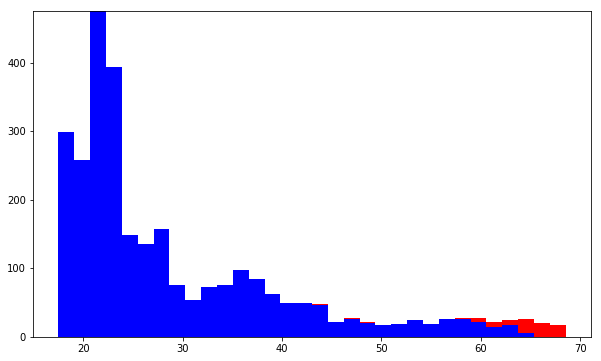

In [31]:
#a = df.loc[df['anomaly1'] == 0, 'ExternalTemp']
#b = df.loc[df['anomaly1'] == 1, 'ExternalTemp']

a = df.loc[df['anomaly1'] == 0, 'T6_2']
b = df.loc[df['anomaly1'] == 1, 'T6_2']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

In [32]:
# file_name = 'Means_tempWithoutAnomalies.csv'
# no_Anom = df.loc[df['anomaly2'] == 1, ['Date','Time','ExternalTemp', 'Internaltemp','IsHeatingOn','NumberofPeople']] #anomaly
# no_Anom.to_csv(file_name, sep=';', encoding='utf-8')
# no_Anom

### Isolation Forest for anomaly detection.

The IsolationForest "isolates" observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeable shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [40]:
our1 = pd.read_excel("dataset.xlsx")
our2 = pd.read_excel("meteo.xlsx")
df = pd.merge(our1, our2, on='Temps')

In [41]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#df['T2_1'].describe()
#df['T3_1'].describe()#!!
#df['T3_2'].describe()
#df['T4_2'].describe()
#df['T3_1'].describe()
df['T7_2'].describe()

count   2880.000
mean      27.395
std        8.009
min       17.700
25%       21.310
50%       24.135
75%       32.972
max       51.140
Name: T7_2, dtype: float64

In [42]:
#data = df[['Internaltemp', 'ExternalTemp', 'IsHeatingOn','NumberofPeople']]
#data = df[['ExternalTemp', 'Internaltemp','IsHeatingOn','NumberofPeople','Date_delta','Time_delta']]


#data = df[['T3_1','T3_2','T4_1','T4_2','T5_1','T5_2','T6_1','T6_2','T7_1','T7_2','T8_1','T8_2','T9_1','T9_2']]
data = df[['T3_1','T3_2','T6_1','T6_2']]
outliers_fraction = 0.01
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)# that is telling the model that the proportion of outliers in the data set is 0.01.
model.fit(data)

df['anomaly2'] = pd.Series(model.predict(data))
# df['anomaly2'] = df['anomaly2'].map( {1: 0, -1: 1} )

#fig, ax = plt.subplots(figsize=(10,6))

#a = df.loc[df['anomaly2'] == -1, ['ExternalTemp', 'Internaltemp']] #anomaly , ret -1 if anomaly

#ax.plot(df['ExternalTemp'], df['Internaltemp'], color='blue', label='Normal')
#ax.scatter(a['ExternalTemp'],a['Internaltemp'], color='red', label='Anomaly')
a = df.loc[df['anomaly2'] == -1, ['T3_1','T3_2','T6_1','T6_2']]
a

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


,T3_1,T3_2,T6_1,T6_2
1107,54.460,26.480,26.450,44.190
1143,9.350,29.450,26.640,56.120
1145,48.860,29.710,26.710,55.740
1152,52.450,30.300,26.640,57.610
1163,46.140,31.420,26.710,60.280
1178,47.720,34.030,26.710,63.110
1186,15.630,36.900,26.710,64.340
1189,42.750,38.120,26.710,64.900
1195,45.240,39.280,26.910,62.500
1204,52.890,40.310,26.970,59.040


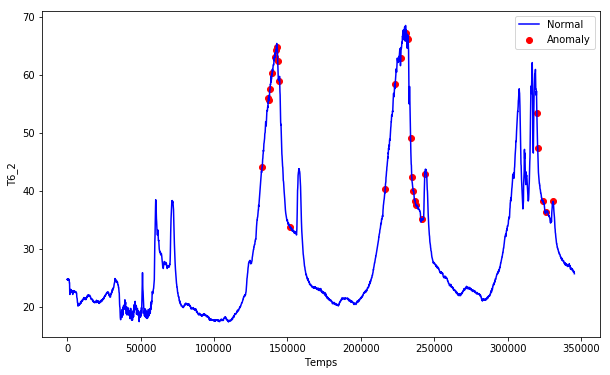

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly2'] == -1, ['Temps', 'T6_2']] #anomaly , ret -1 if anomaly

ax.plot(df['Temps'], df['T6_2'], color='blue', label='Normal')
ax.scatter(a['Temps'],a['T6_2'], color='red', label='Anomaly')

plt.xlabel('Temps')
plt.ylabel('T6_2')
plt.legend()
plt.show();

In [44]:
#df.loc[df['anomaly2'] == -1, ['Date','Time','ExternalTemp', 'Internaltemp','IsHeatingOn','NumberofPeople']] #anomaly
df.loc[df['anomaly2'] == -1, ['T3_1','T3_2','T6_1','T6_2']]

#from scipy.signal import medfilt
#from scipy import arange
#medfilt(a)

,T3_1,T3_2,T6_1,T6_2
1107,54.460,26.480,26.450,44.190
1143,9.350,29.450,26.640,56.120
1145,48.860,29.710,26.710,55.740
1152,52.450,30.300,26.640,57.610
1163,46.140,31.420,26.710,60.280
1178,47.720,34.030,26.710,63.110
1186,15.630,36.900,26.710,64.340
1189,42.750,38.120,26.710,64.900
1195,45.240,39.280,26.910,62.500
1204,52.890,40.310,26.970,59.040


In [45]:
file_name = 'Forest_tempWithoutAnomalies1.xlsx'
no_Anom = df.loc[df['anomaly2'] == 1, ['Temps','T1_1','T1_2','T2_1','T2_2','T3_1','T3_2','T4_1','T4_2','T5_1','T5_2','T6_1','T6_2','T7_1','T7_2','T8_1','T8_2','T9_1','T9_2','Temperature exterieure','Pression']]
#no_Anom = df.loc[df['anomaly2'] == 1, ['Date','Time','ExternalTemp', 'Internaltemp','IsHeatingOn','NumberofPeople']] #anomaly
no_Anom.to_excel(file_name,encoding='utf-8')
#no_Anom

In [46]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
no_Anom['T6_2'].describe()

count   2851.000
mean      29.256
std       11.881
min       17.490
25%       21.160
50%       23.840
75%       34.860
max       68.550
Name: T6_2, dtype: float64

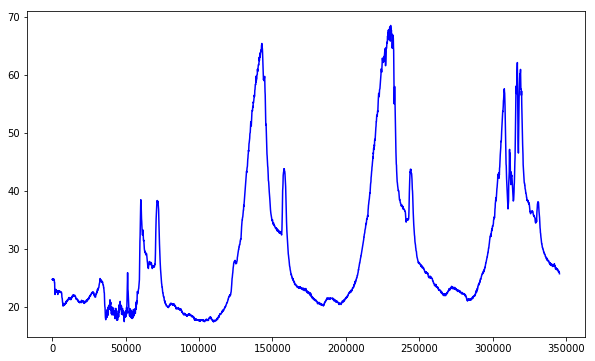

In [47]:
#our2 = pd.read_excel("meteo.xlsx")
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(no_Anom['Temps'], no_Anom['T6_2'], color='blue', label='Normal')

In [ ]:
# visualisation of anomaly with avg price repartition
a = df.loc[df['anomaly2'] == 1, 'T3_2']
b = df.loc[df['anomaly2'] == -1, 'T3_2']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

Because our anomaly detection is unsupervised learning.  After building the models, we have no idea how well it is doing as we have nothing to test it against. Hence, the results of those methods need to be tested in the field before placing them in the critical path.

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import r2_score
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam